Text(0, 0.5, 'color_intensity')

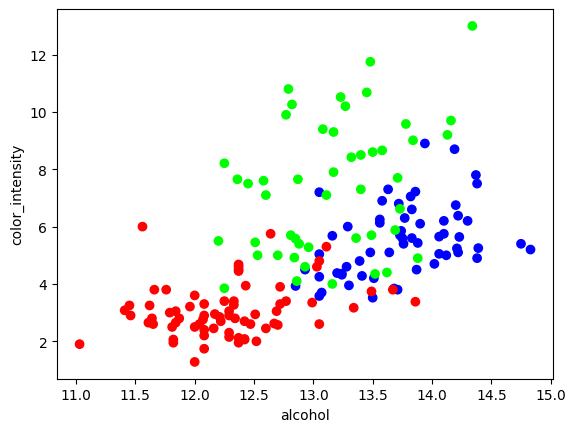

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt

features = [0,9]

wine = datasets.load_wine()
data = wine.data[:, features]
targets = wine.target

plt.scatter(data[:, 0], data[:, 1], c=targets, cmap=plt.cm.brg)
plt.xlabel(wine.feature_names[features[0]])
plt.ylabel(wine.feature_names[features[1]])

Text(0, 0.5, 'color_intensity')

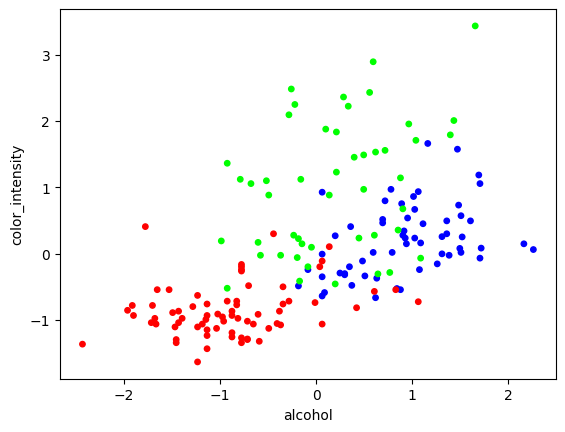

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(data)

plt.scatter(data[:, 0], data[:, 1], c=targets, s=15, cmap=plt.cm.brg)
plt.xlabel(wine.feature_names[features[0]])
plt.ylabel(wine.feature_names[features[1]])

In [9]:
import torch
from torch import nn
import numpy as np

input_size  = data.shape[1]
hidden_size = 32
out_size    = len(wine.target_names)

net = nn.Sequential(nn.Linear(input_size, hidden_size), nn.ReLU(), nn.Linear(hidden_size, out_size), nn.Softmax())

def plot_boundary(X, y, model):
  x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
  y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
  
  spacing = min(x_max - x_min, y_max - y_min) / 100
  
  XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
                       np.arange(y_min, y_max, spacing))
  
  data = np.hstack((XX.ravel().reshape(-1,1), 
                    YY.ravel().reshape(-1,1)))
  
  # For multi-class problems
  db_prob = model(torch.Tensor(data))
  clf = np.argmax(db_prob.cpu().data.numpy(), axis=-1)
  
  Z = clf.reshape(XX.shape)
  
  plt.contourf(XX, YY, Z, cmap=plt.cm.brg, alpha=0.5)
  plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', s=25, cmap=plt.cm.brg)


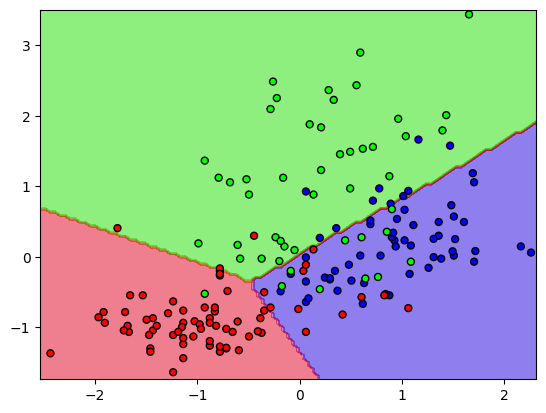

In [48]:
plot_boundary(data, targets, net)

In [17]:
from torch import optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=1e-3)

X = torch.FloatTensor(data)
Y = torch.LongTensor(targets)

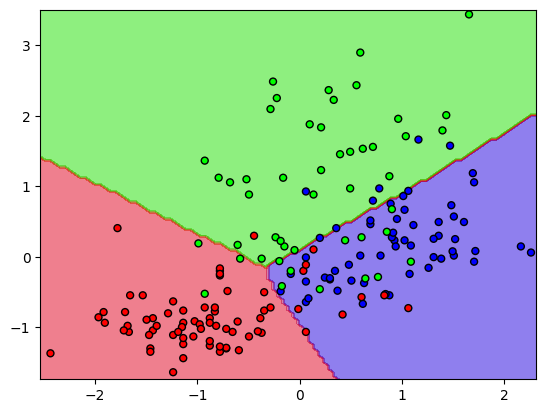

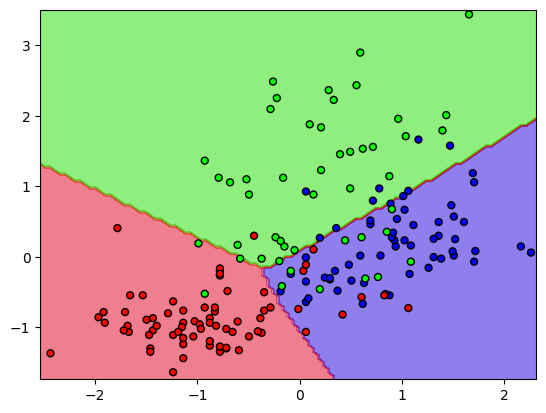

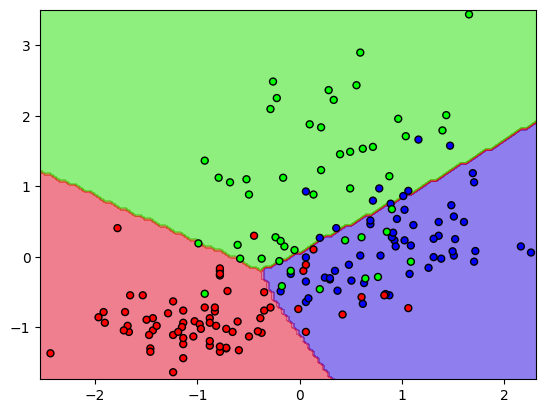

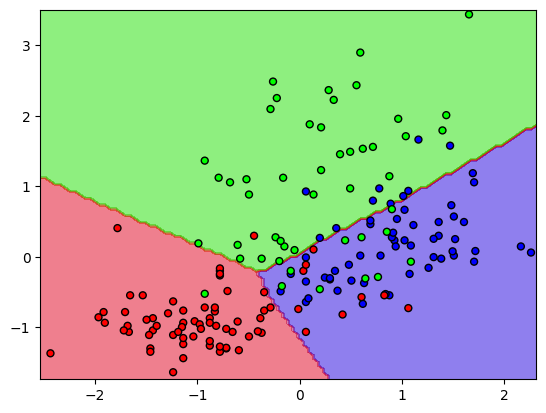

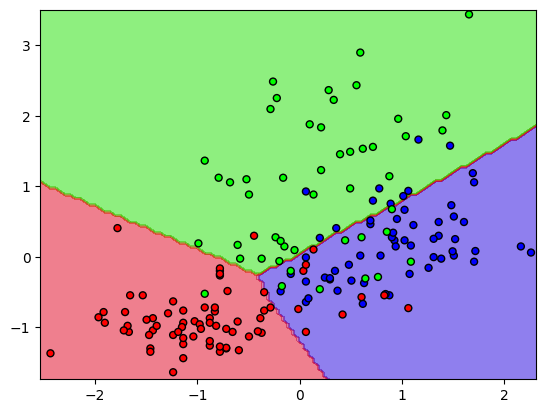

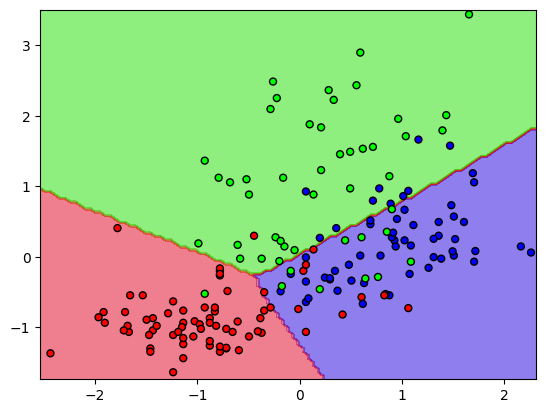

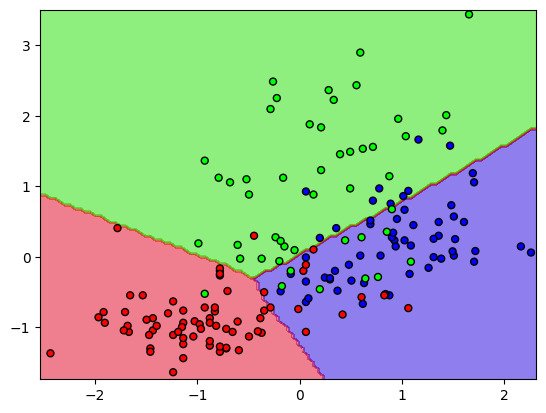

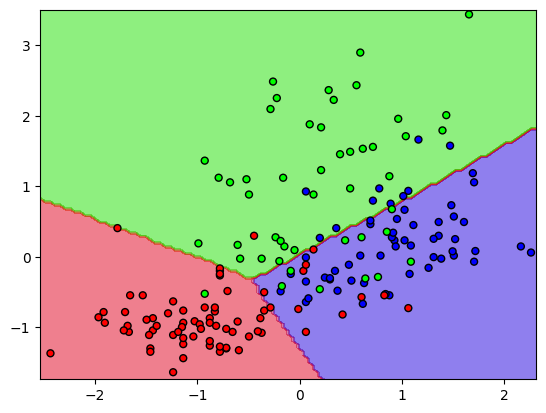

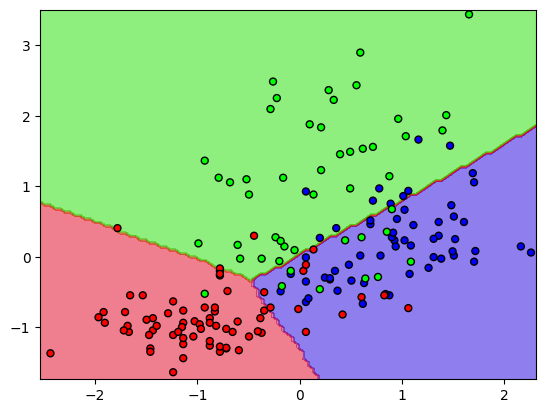

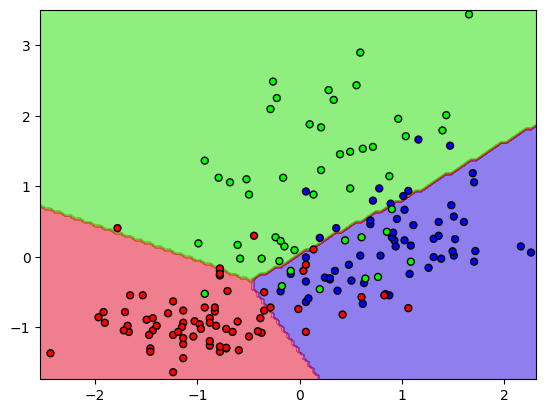

In [47]:
for i in range(100):
    pred = net(X)
    loss = criterion(pred, Y)

    loss.backward()
    optimizer.step()

    if i % 10 == 0:
        plt.figure()
        plot_boundary(data, targets, net)